In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train)
x = np.zeros((6000,28,28))
y = np.zeros(6000)
xx = np.zeros((1000,28,28))
yy = np.zeros(1000)

for ii in range(10):
    x[ii*600:(ii+1)*600,::] = x_train[y_train==ii,::][0:600]
    y[ii*600:(ii+1)*600] = y_train[y_train==ii][0:600]
    xx[ii*100:(ii+1)*100,::] = x_test[y_test==ii,::][0:100]
    yy[ii*100:(ii+1)*100] = y_test[y_test==ii][0:100]



tx = np.zeros((6000,28,28))
ty = np.zeros(6000)
txx = np.zeros((1000,28,28))
tyy = np.zeros(1000)

for ii in range(10):
    tx[ii*600:(ii+1)*600,::] = x_train[y_train==ii,::][600:1200]
    ty[ii*600:(ii+1)*600] = y_train[y_train==ii][600:1200]
    txx[ii*100:(ii+1)*100,::] = x_test[y_test==ii,::][100:200]
    tyy[ii*100:(ii+1)*100] = y_test[y_test==ii][0:100]


x_train2 = x
y_train2 = y
x_test2 = xx
y_test2 = yy


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[9 0 0 ... 3 0 5]


(6000, 28, 28)


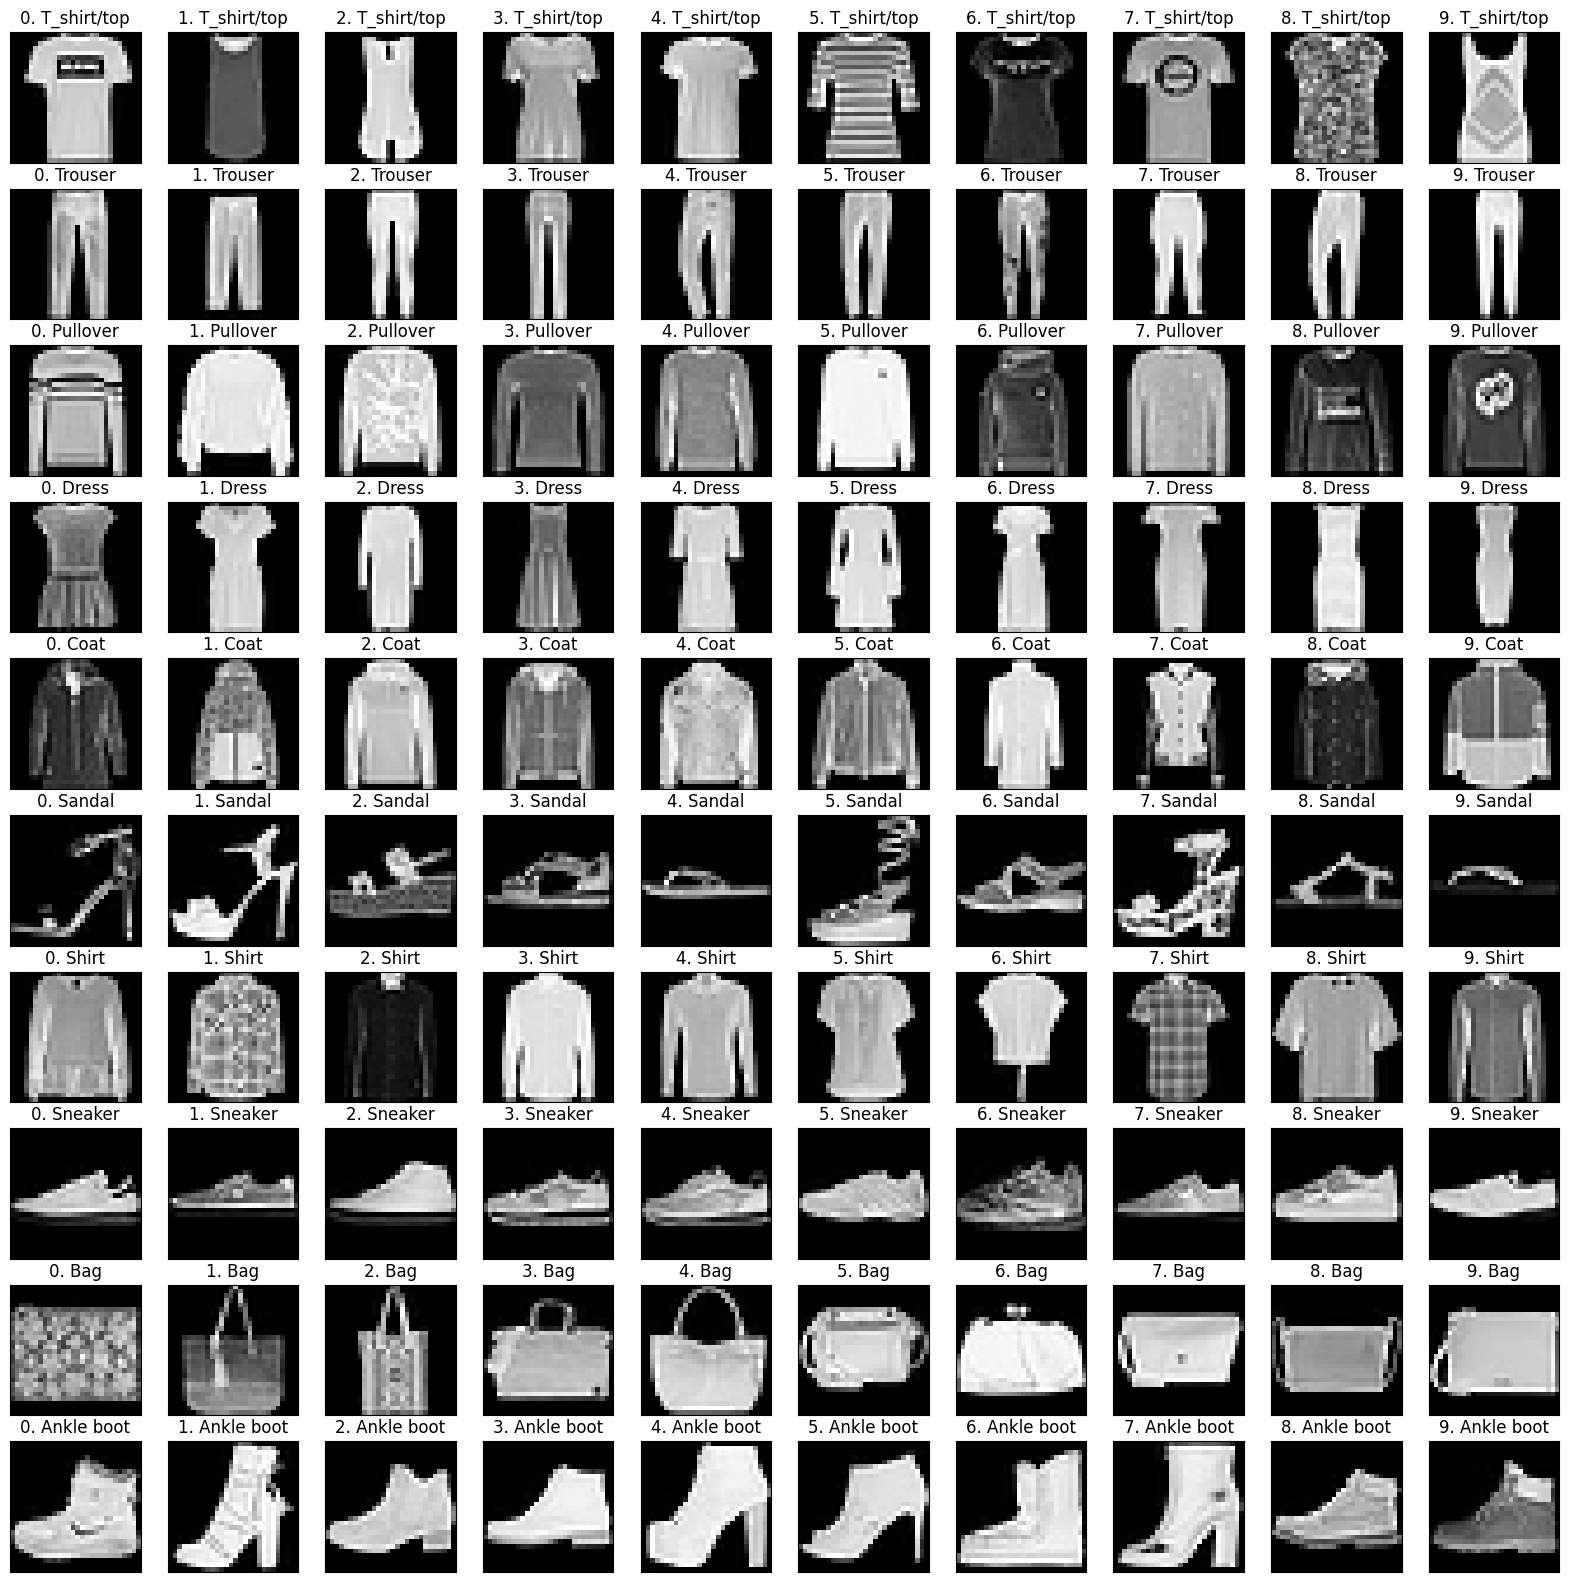

In [26]:
#클래스별 10개씩 

print(x_train2.shape)
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(20,20))
for i in range(10):
    for j in range(10):
        plt.subplot(10,10,i*10 + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train2[i*600+j][0:28],'gray')
        label_index = int(y_train2[i*600+j])
        plt.title('{}. {}'.format(j, class_names[label_index]))

    #plt.axis('off')
    #print(len(x_train2[i]))
    
plt.show()

In [19]:
#이미지 바꿔치기


#6000 12000 18000 24000 30000 36000 42000
error_List = [5,6,7,8,12,14,17,18,22,23,24,26,27,28,29,30,37,39,40,42,44,45,46,47,48,51,52,54,55,56,59,65,68,70,71,72,79,81,84,85,86,90,
              103,104,107,109,112,114,116,118,120,121,122,125,126,127,129,132,133,137,138,142,143,145,146,147,153,157,158,163,169,172,174,175,179,180,181,182,185,186,190,191,192,194,197,199,
              201,204,206,207,212,216, 221,227,231,232,233,237,238,240,242,244,250,251,252,256,258,264,265,272,274,279,285,286,288,290,291,294,296,297,299,
              302,305,306,309,310,311,312,316,317,321,323,324,325,326,327,330,332,333,338,339,340,341,343,345,346,348,349,352,354,355,356,358,367,369,370,372,374,375,376,377,379,385,388, 391,393,394,395,397,398,
              400,401,402,404,405,406,409,410,419,423,429, 441,446,451,453,455,462,463,466,467,473,475,476,477,478,479,485,486,487,488,489,491,497,499,
              500,501,507,508,509,514,518,519,520,521,527,529,534,535,536,540,547,550,554,555,556,558,561,562,563,567,569,571,572,573,575,581,582,588,589,598]

for i in range(len(error_List)):
    x_train2[3600+error_List[i]][0:28] = tx[3600+error_List[i]][0:28]

print(len(error_List))

240


(6000, 28, 28)


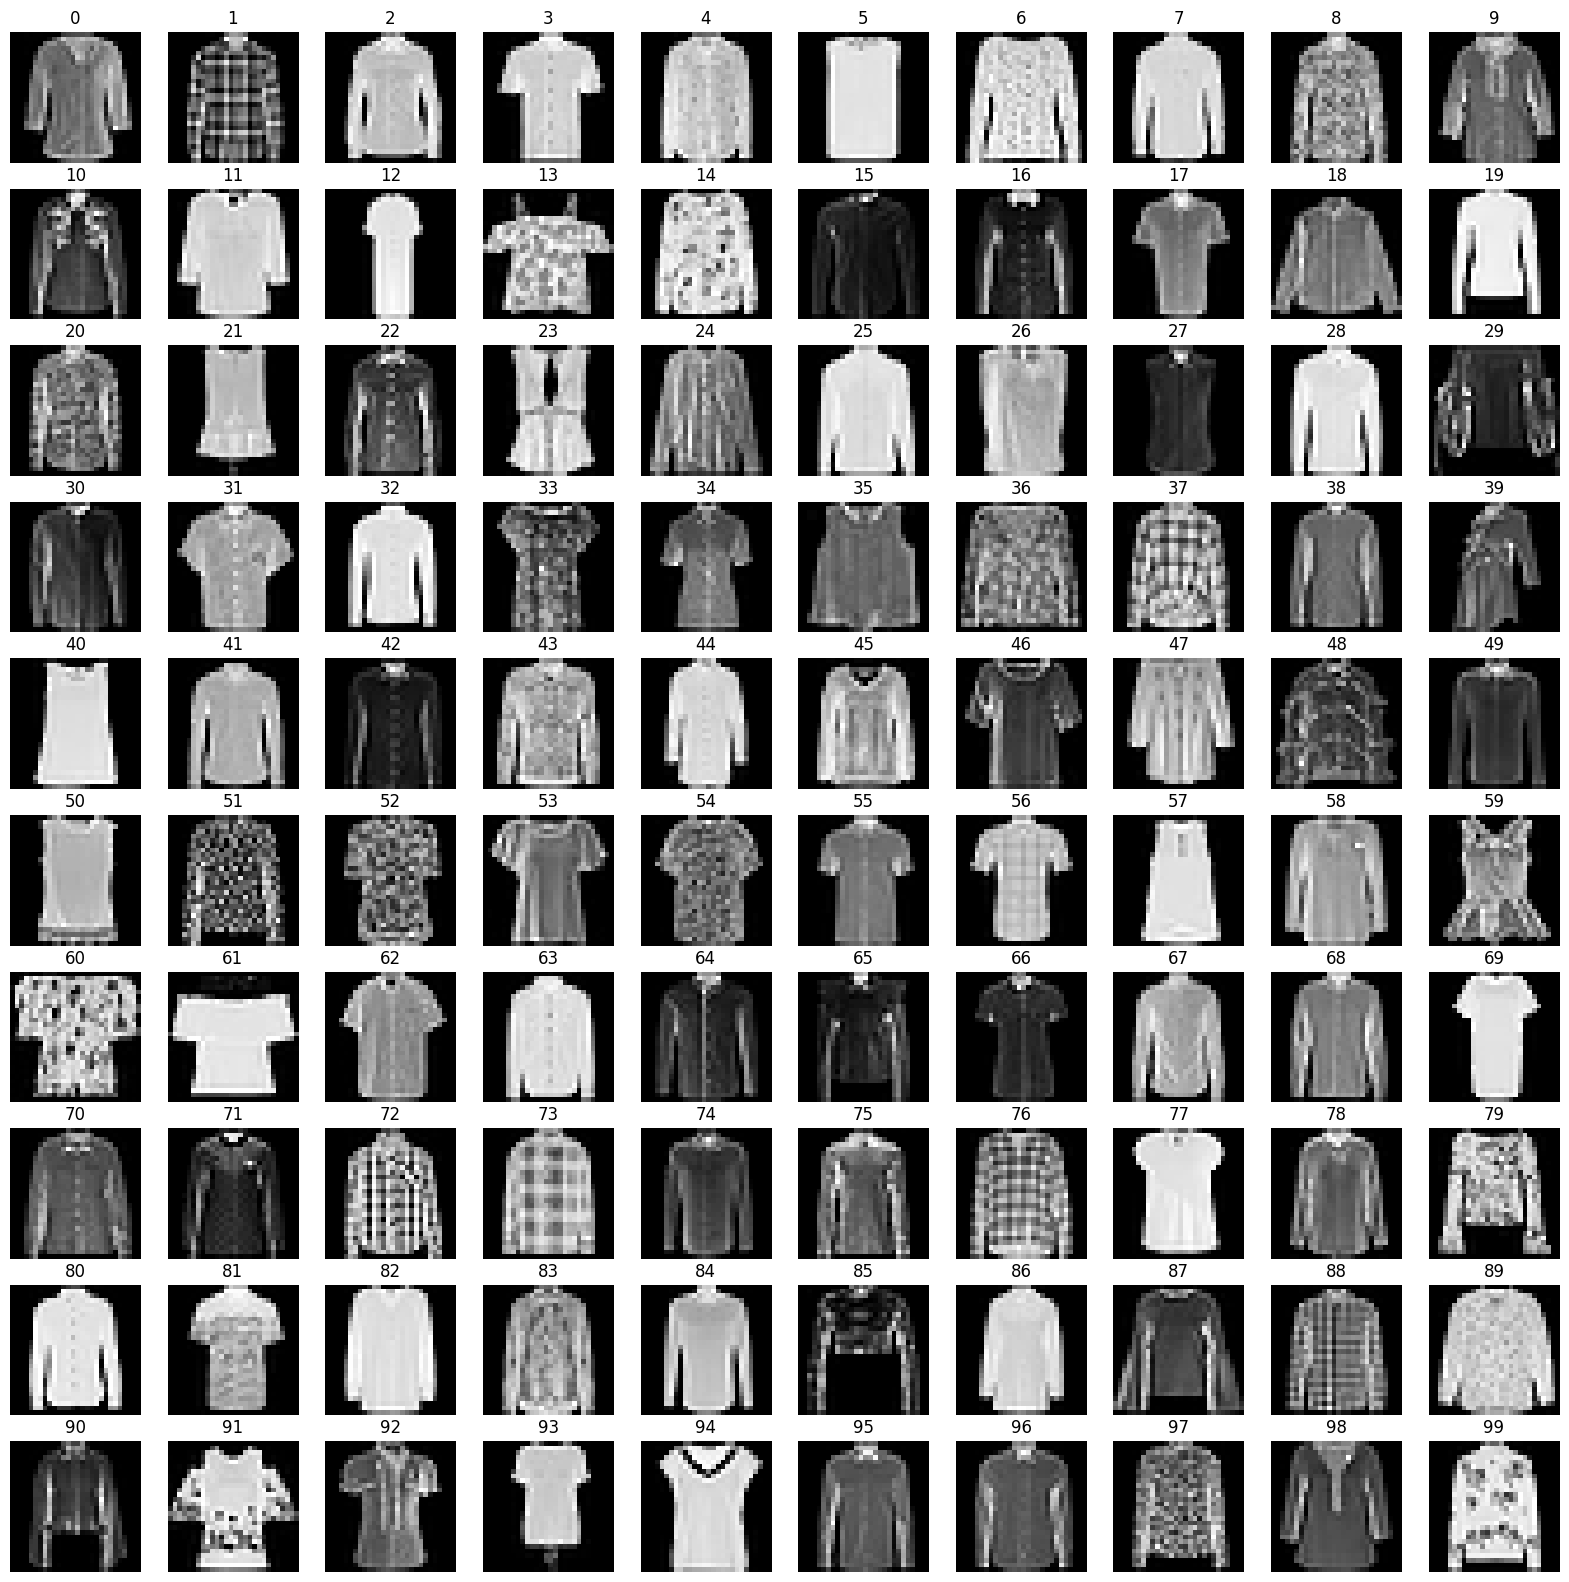

In [36]:
#셔츠 이미지 100개씩..

print(x_train2.shape)
plt.figure(figsize=(20,20))


for i in range(0,100):
    plt.subplot(10,10,i+1)
    #print(i)
    plt.imshow(x_test2[600+i][0:28],'gray')
    plt.title(i)
    plt.axis('off')
    #plt.show()

    #plt.close()
plt.show()



#print(len(change_label))

36


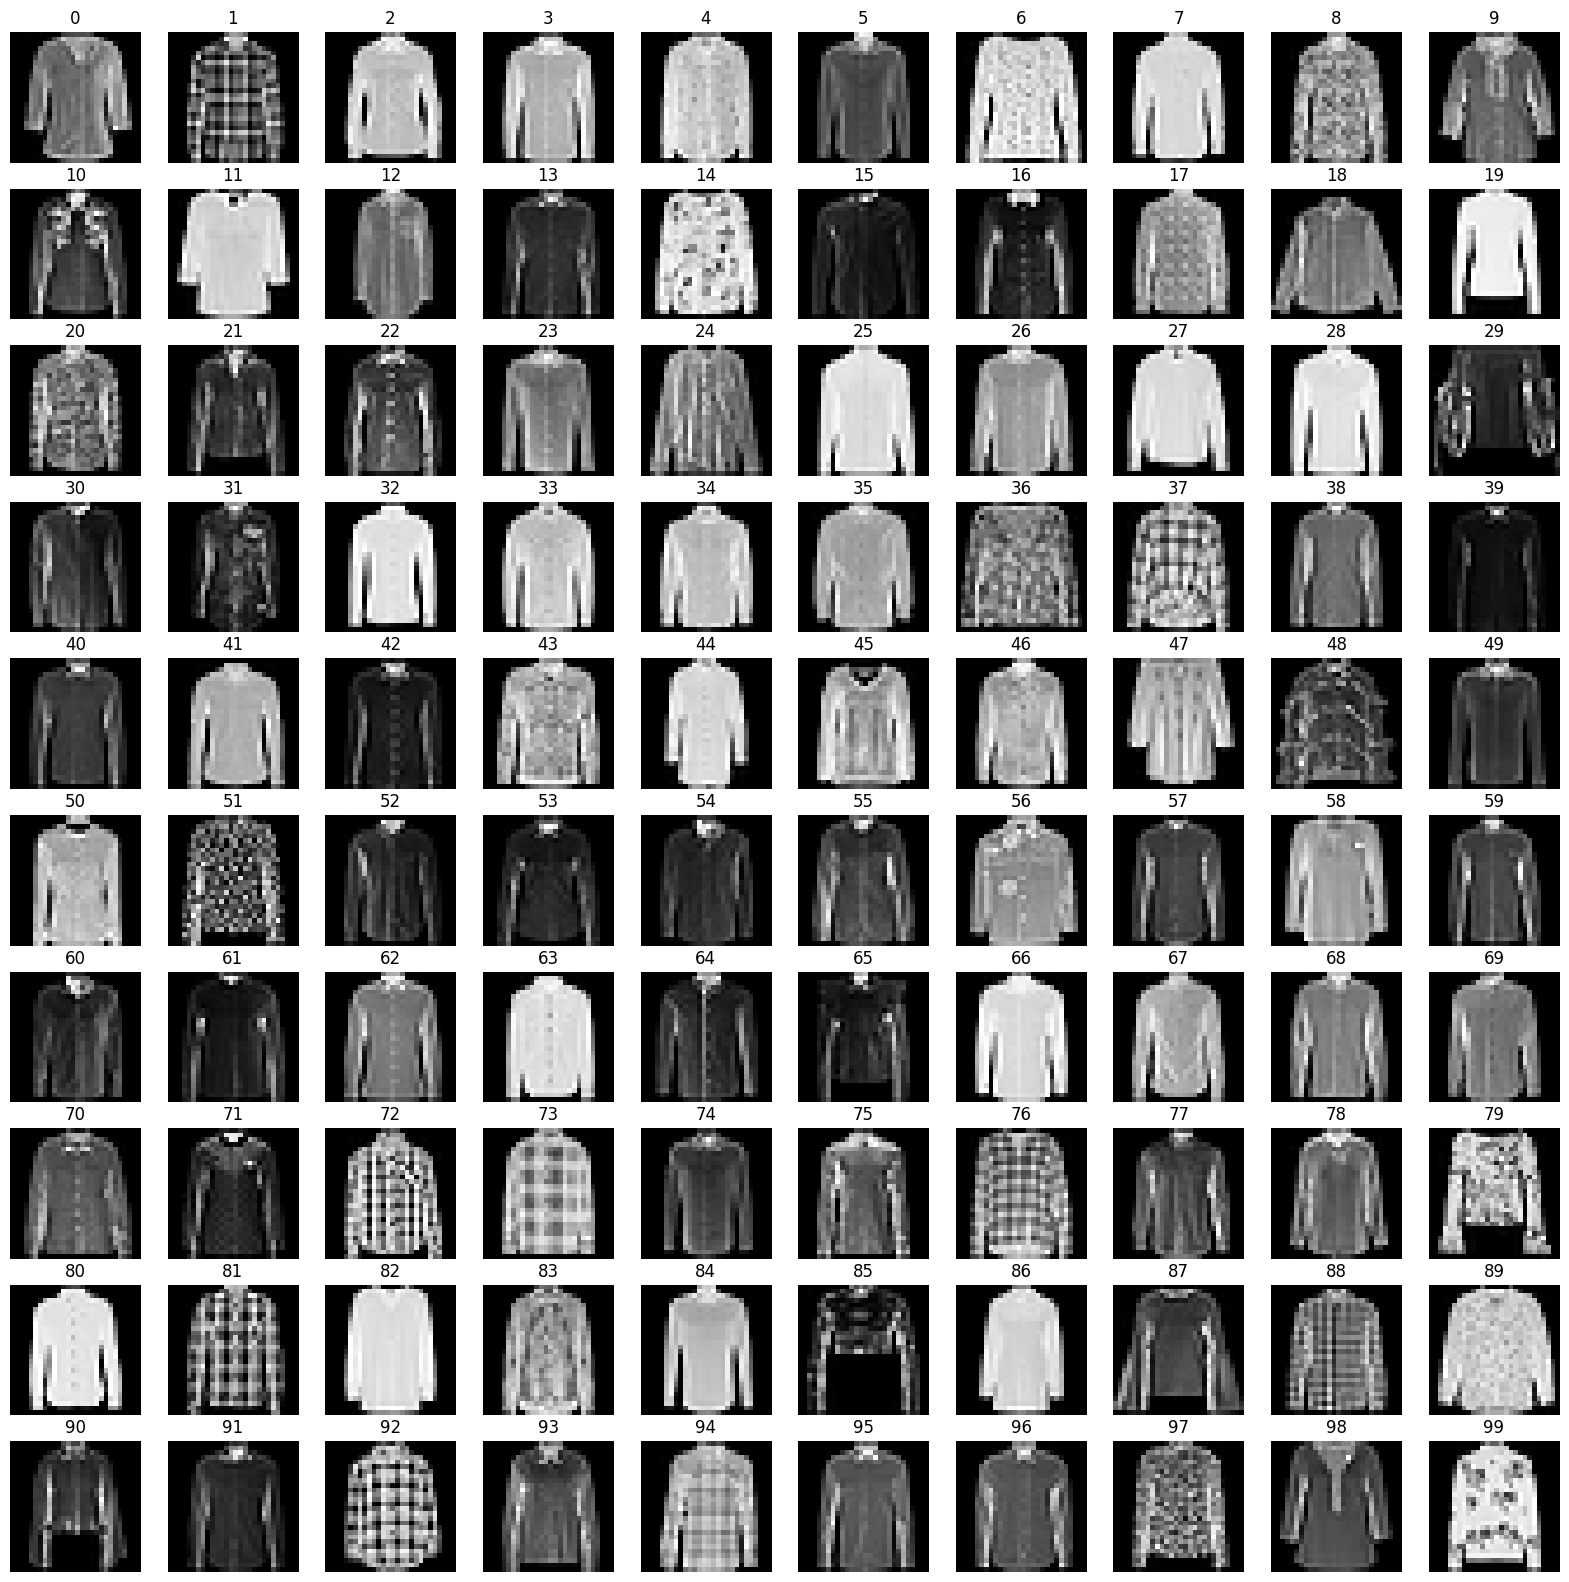

In [25]:
orin_not_shirt = [3,5,12,13,17,21,23,26,27,31,33,34,35,39,40,46,50,52,53,53,54,55,56,57,59,60,61,62,66,69,77,81,91,92,93,94 ]
change_label =   [0,1,2,3,6,13,14,18,19,27,29,32,33,39,41,42,44,47,48,53,56,57,61,65,70,72,77,82,84,85,86,89,90,92,96,99]
print(len(orin_not_shirt))
orin_not_Tshirt = [12,15,34,47,83,85]
change_Tshirt_label = [1,2,3,4,6,7]#[5,14,20,25,57,87,93]

for i in range(len(orin_not_shirt)):
    x_test2[600+orin_not_shirt[i]]=txx[600+change_label[i]]
for i in range(len(orin_not_Tshirt)):
    x_test2[orin_not_Tshirt[i]]=txx[change_Tshirt_label[i]]
plt.figure(figsize=(20,20))


for i in range(0,100):
    plt.subplot(10,10,i+1)
    #print(i)
    plt.imshow(x_test2[600+i][0:28],'gray')
    plt.title(i)
    plt.axis('off')
    #plt.show()

    #plt.close()
plt.show()

In [ ]:
for i in range(1000):

    if y_test2[i]==6:
        
        plt.imshow(x_test2[i][0:28],'gray')
        plt.axis('off')
        plt.show()

    plt.close()

    
plt.show()

In [6]:
def data_ready2(train, test):
    #print(len(train[0]),len(test[0]))
    #print(train.shape)
    trainSetf = np.zeros((600*10, 28*28))
    testSetf = np.zeros((100*10, 28*28))

    for i in range(6000):
        trainSetf[i,:] = train[i].flatten().astype('float32') / 255

    for i in range(1000):
        testSetf[i,:] = test[i].flatten().astype('float32') / 255

    return trainSetf, testSetf
x_trainF , x_testF = data_ready2(x_train2, x_test2)


In [21]:

def split_img(img):
    global lenl
    trainF =[]# np.zeros(8)
    image = np.array(img, dtype='uint8')
    image_bin = (image!=0).astype(int)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the center of gravity of the largest contour
    moments = cv2.moments(largest_contour)
    center_of_gravity = (int(moments["m10"] / moments["m00"]), int(moments["m01"] / moments["m00"]))

    area1 = (image!=0)[0:center_of_gravity[1],0:center_of_gravity[0]]
    area1_sum =  np.sum(area1)
    trainF.append( area1_sum/np.size(area1))
    area2 = (image!=0)[0:center_of_gravity[1],center_of_gravity[0]:28]
    area2_sum =  np.sum(area2)
    trainF.append(area2_sum/np.size(area2))
    area3 = (image!=0)[center_of_gravity[1]:28,0:center_of_gravity[0]]
    area3_sum =  np.sum(area3)
    trainF.append(area3_sum/np.size(area3))
    area4 = (image!=0)[center_of_gravity[1]:28,center_of_gravity[0]:28]
    area4_sum =  np.sum(area4)
    trainF.append( area4_sum/np.size(area4))

    x,y = np.where(image[0:14]!=0)
    area5 = np.max(y)-np.min(y)
    
    x,y = np.where(image[14:28]!=0)
    area6 = np.max(y)-np.min(y)

    trainF.append(area5)
    trainF.append(area6)


    x,y = np.where(img!=0)
    trainF.append(np.max(x)-np.min(x))
    trainF.append(np.max(y)-np.min(y))

    y_sum=np.sum(image_bin,axis = 1)
    x_sum=np.sum(image_bin,axis = 0)
    trainF = np.concatenate((trainF,y_sum))#,x_sum))

    return np.array(trainF)

def img_rate(img):
    x,y = np.where(img!=0)
    height = np.max(x)-np.min(x)
    width = np.max(y)-np.min(y)
    print(height)
    print(width)

#a= img_rate(x_train[4201])

def data_ready4(train,test):
    trainSetf = np.zeros((600*10, 36))
    testSetf = np.zeros((100*10,36))
    for i in range(6000):
        trainSetf[i,:] = split_img(train[i])

    for i in range(1000):
        testSetf[i,:] = split_img(test[i])
    return trainSetf, testSetf

x_trainF2 , x_testF2 = data_ready4(x_train2, x_test2)
print(x_trainF2)


#a = split_img(x_train2[1801])
#
# for i in range(10):
#     a = split_img(x_train2[600*i+1])
#     print(a)


[[ 0.64880952  0.73214286  0.50446429 ... 14.         15.
  15.        ]
 [ 0.31952663  0.45128205  0.36410256 ... 13.         11.
   8.        ]
 [ 0.32417582  0.36190476  0.3956044  ... 12.         11.
   7.        ]
 ...
 [ 0.29017857  0.7797619   0.66964286 ... 23.         17.
   0.        ]
 [ 0.1875      0.6875      0.67708333 ... 22.         17.
   0.        ]
 [ 0.16796875  0.55208333  0.609375   ...  0.          0.
   0.        ]]


In [30]:
a= []
for i in [1,5,7,9,15,50,100,200,500]:
    
    myKnn = KNeighborsClassifier(n_neighbors=i)
    
    myKnn.fit(x_trainF2, y_train2)
    knnResult = myKnn.predict(x_testF2)
    a.append(accuracy_score(y_test2, knnResult))

#print(np.shape(x_test_reduced))
#print(x_test_reduced[0])
print(a,np.argmax(a))
print(confusion_matrix(y_test2, knnResult))

[0.654, 0.668, 0.67, 0.663, 0.66, 0.627, 0.598, 0.553, 0.507] 2
[[43  2 30  8  5  0  7  0  5  0]
 [ 0 90  0  8  2  0  0  0  0  0]
 [ 1  0 69  2 20  0  7  0  1  0]
 [ 1 30  6 52  9  0  0  0  2  0]
 [ 0  1 48 12 34  0  5  0  0  0]
 [ 0  0  0  0  0  0  0 57 12 31]
 [ 8  1 45  7 21  0  8  0 10  0]
 [ 0  0  0  0  0  0  0 83  8  9]
 [ 0  0  9  7 11  0  6  7 59  1]
 [ 0  0  1  0  2  0  1 10 17 69]]


In [198]:
a= []

for i in [1,5,7,9,15,50,100,200,500]:
    
    myKnn = KNeighborsClassifier(n_neighbors=i)
    lda = LinearDiscriminantAnalysis(n_components=9)
    lda.fit(x_trainF2,y_train2)
    x_train_reduced = lda.transform(x_trainF2)

        # Reduce the dimensionality of the test data
    x_test_reduced = lda.transform(x_testF2)

    myKnn.fit(x_train_reduced, y_train2)
    knnResult = myKnn.predict(x_test_reduced)
    a.append(accuracy_score(y_test2, knnResult))

print(np.shape(x_test_reduced))
print(x_test_reduced[0])
print(a,np.argmax(a))
#print(confusion_matrix(y_test2, knnResult))
#print(accuracy_score(y_test2, knnResult))

(1000, 9)
[-3.7979938   0.62613061 -2.58764436  1.00255474  0.61914571  1.62557639
 -0.51699957 -0.04768657 -0.22940623]
[0.754, 0.797, 0.806, 0.81, 0.807, 0.796, 0.784, 0.78, 0.761] 3


In [24]:
a=[]
b=[0,0,0]

for i in [1,5,7,9,15,50,100,200,500]:
    #print(i)
    #for j in range(1,37):
    myKnn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    pca = PCA(n_components=j)
    pca.fit(x_trainF2)
    x_train_reduced = pca.transform(x_trainF2)
    x_test_reduced = pca.transform(x_testF2)

    myKnn.fit(x_train_reduced, y_train2)
    knnResult = myKnn.predict(x_test_reduced)
        # if b[0]<accuracy_score(y_test2, knnResult):
        #     b = [accuracy_score(y_test2, knnResult),i,j]
    a.append(accuracy_score(y_test2, knnResult))

#print(b)
        

#print(np.shape(x_test_reduced))
#print(x_test_reduced[0])
print(a,np.argmax(a))
#print(confusion_matrix(y_test2, knnResult))
print(accuracy_score(y_test2, knnResult))

[0.796, 0.815, 0.813, 0.812, 0.81, 0.776, 0.743, 0.705, 0.606] 1
0.606


In [132]:
print(b)

[0.536, 100, 0]


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


myKnn = KNeighborsClassifier(n_neighbors=7)
myKnn.fit(x_trainF2, y_train2)
knnResult = myKnn.predict(x_testF2)
#print(knnResult)
#print(knnResult)
a= confusion_matrix(y_test2, knnResult)
print(accuracy_score(y_test2, knnResult))


for i in range(10):
    for j in range(10):
        print("%3d "%(a[i][j]),end = "")
    print()


0.687
 84   0   3   9   2   0   1   0   1   0 
  1  90   1   8   0   0   0   0   0   0 
  2   1  65   2  22   0   8   0   0   0 
  6   4   3  75   9   0   2   0   1   0 
  2   0  22  10  51   0  14   0   1   0 
  0   0   0   0   0  54   0  22   3  21 
  1   0  26   0  29   0  43   0   1   0 
  0   0   0   0   0  10   0  73   1  16 
  1   0   2   7   5   0   3   2  77   3 
  0   0   0   1   0   8   0  12   4  75 


In [ ]:
print(y_test2.shape)
class_names = ['T_shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(20,20))
cnt = 1
for i in range(0,100):
    if y_test2[i]!=knnResult[i]:
        plt.subplot(10,10,cnt)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test2[i][0:28],'gray')
        
        label_index = int(y_test2[i])
        result_index = int(knnResult[i])
        plt.title('{}/{}'.format( class_names[label_index],class_names[result_index]))
        cnt+=1
    #plt.axis('off')
    #print(len(x_train2[i]))
    
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

myBayes = MultinomialNB()
myBayes.fit(x_trainF, y_train2)
BayesResult = myBayes.predict(x_testF)
print(confusion_matrix(y_test2, BayesResult))

In [ ]:
from sklearn.svm import SVC

mySVM = SVC(kernel='linear') #rbf, poly, sigmiod
mySVM.fit(x_trainF, y_train2)
SVMResult = mySVM.predict(x_testF)
print(confusion_matrix(y_test2, SVMResult))

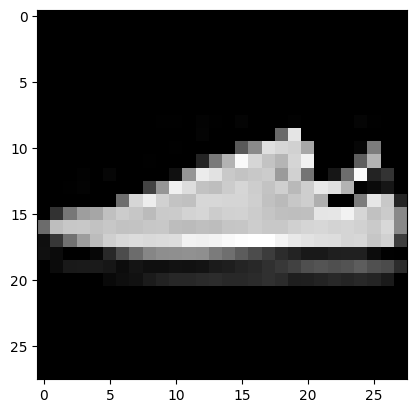

In [27]:
def aa(img):
    global lenl
    trainF =[]# np.zeros(8)
    image = np.array(img, dtype='uint8')
    image_bin = (image!=0).astype(int)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the center of gravity of the largest contour
    moments = cv2.moments(largest_contour)
    x,y = (int(moments["m10"] / moments["m00"]), int(moments["m01"] / moments["m00"]))
    plt.imshow(img,"gray")
    #plt.scatter(14,14,s=50,c="red")
    #plt.plot([10, 10], [20, 20], color="blue",linewidth=4)
    plt.show()


aa(x_train2[4200])